Accuracy for Random Forest: 1.0
Classification Report for Random Forest:
                     precision    recall  f1-score   support

    Base Component       1.00      1.00      1.00         6
Non Base Component       1.00      1.00      1.00         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



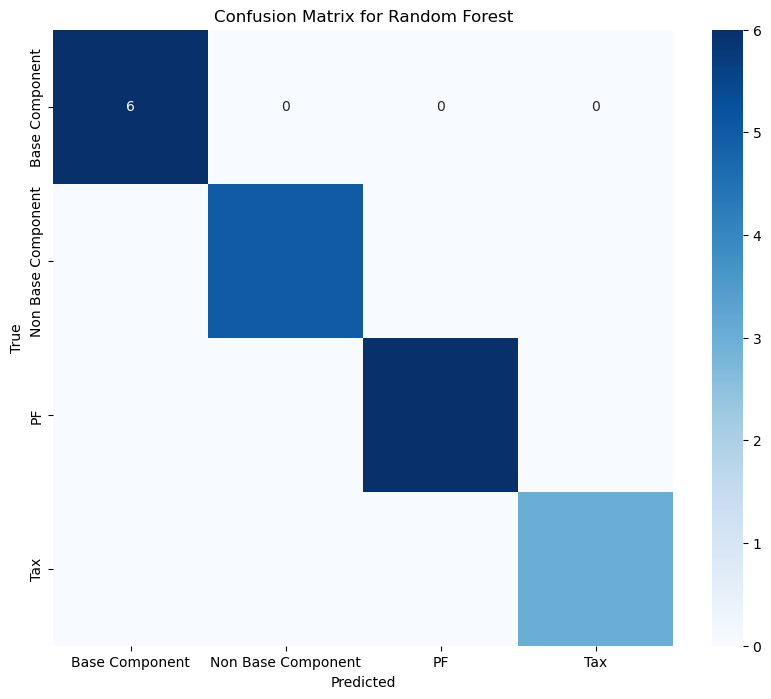

Accuracy for K-Nearest Neighbors: 0.9
Classification Report for K-Nearest Neighbors:
                     precision    recall  f1-score   support

    Base Component       1.00      0.67      0.80         6
Non Base Component       0.71      1.00      0.83         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           0.90        20
         macro avg       0.93      0.92      0.91        20
      weighted avg       0.93      0.90      0.90        20



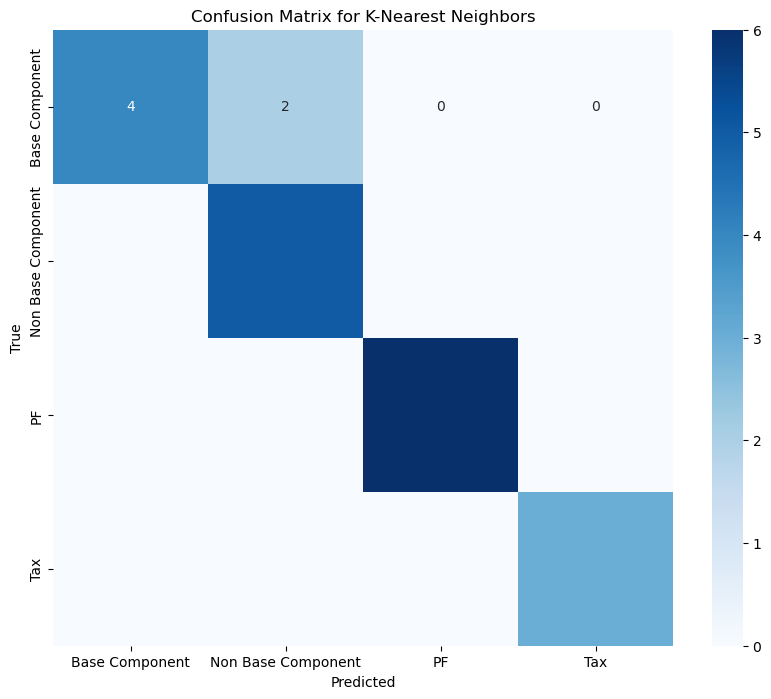

Accuracy for Support Vector Machine: 1.0
Classification Report for Support Vector Machine:
                     precision    recall  f1-score   support

    Base Component       1.00      1.00      1.00         6
Non Base Component       1.00      1.00      1.00         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



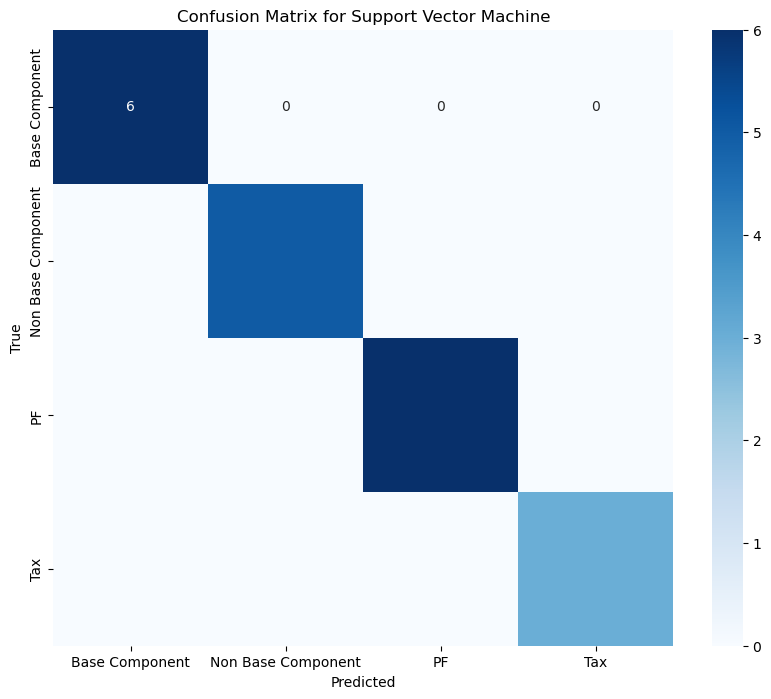

Accuracy for Gradient Boosting: 1.0
Classification Report for Gradient Boosting:
                     precision    recall  f1-score   support

    Base Component       1.00      1.00      1.00         6
Non Base Component       1.00      1.00      1.00         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



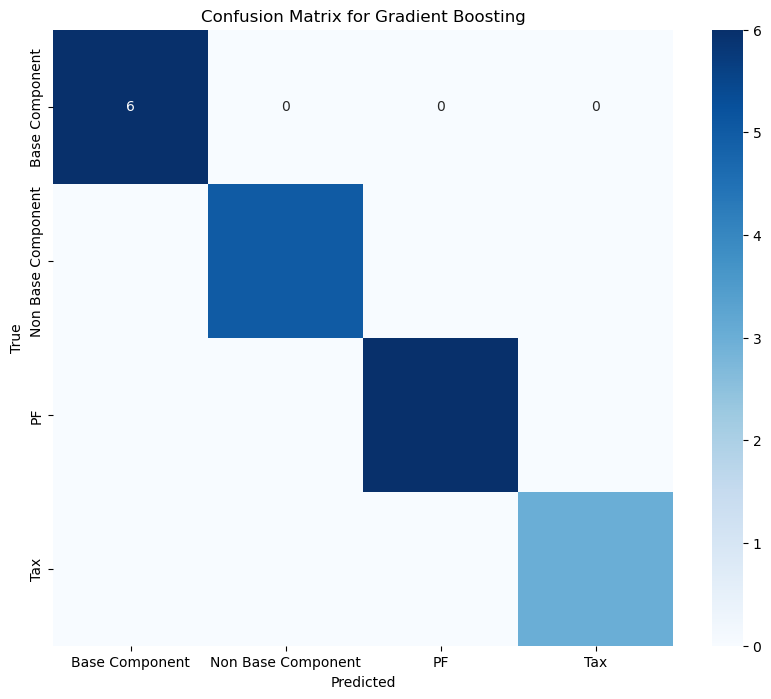

Accuracy for Naive Bayes: 0.95
Classification Report for Naive Bayes:
                     precision    recall  f1-score   support

    Base Component       1.00      0.83      0.91         6
Non Base Component       0.83      1.00      0.91         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           0.95        20
         macro avg       0.96      0.96      0.95        20
      weighted avg       0.96      0.95      0.95        20



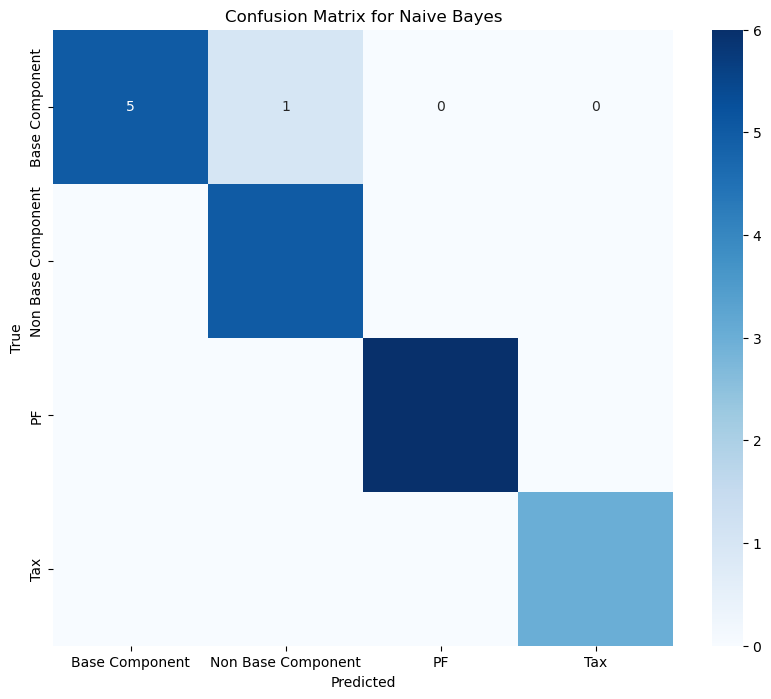

Accuracy for Logistic Regression: 1.0
Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

    Base Component       1.00      1.00      1.00         6
Non Base Component       1.00      1.00      1.00         5
                PF       1.00      1.00      1.00         6
               Tax       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



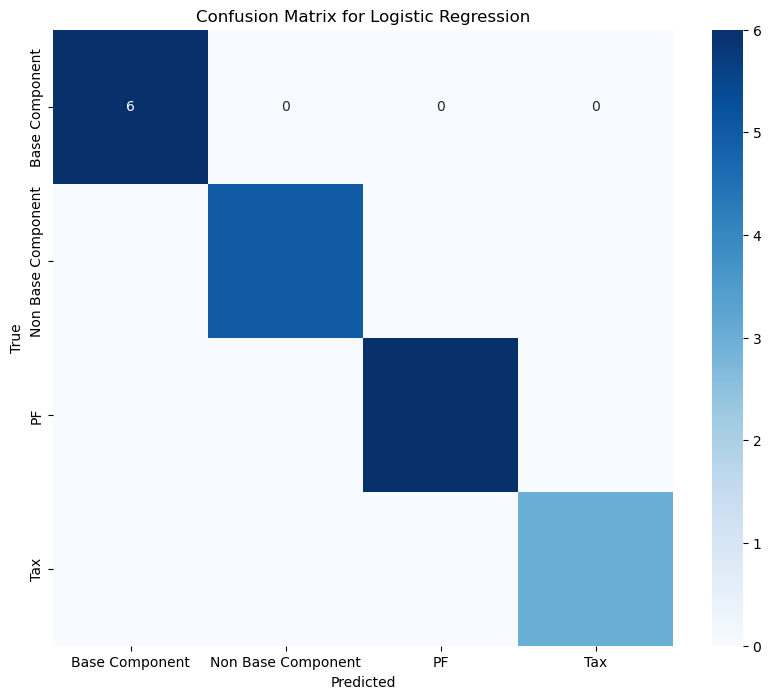

In [3]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from collections import Counter

# Load the Excel file into a DataFrame
df = pd.read_excel(r"C:\Users\Abhishek Barve\Desktop\Payslip Data.xlsx")

# Define the maximum count among all categories
max_count = df['Remarks'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for remarks in df['Remarks'].unique():
    remarks_data = df[df['Remarks'] == remarks]
    if len(remarks_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_remarks_data = resample(remarks_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_remarks_data = resample(remarks_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_remarks_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

# Select the specified columns
X = balanced_df['Components']
y = balanced_df['Remarks']  # Make sure 'Remarks' is the correct column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# List of classifiers to train and evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_tfidf, y_train)
    
    # Save the trained model
    with open(f"{name}_model.pkl", "wb") as file:
        joblib.dump(clf, file)

    # Predict the test set
    y_pred = clf.predict(X_test_tfidf)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Store results
    results[name] = {
        'model': clf,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': conf_matrix
    }

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as file:
    joblib.dump(tfidf, file)


In [4]:
import joblib

# Load the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "rb") as file:
    tfidf = joblib.load(file)

# Load the classifiers
classifiers = {}
for name in ["Random Forest", "K-Nearest Neighbors", "Support Vector Machine", "Gradient Boosting", "Naive Bayes", "Logistic Regression"]:
    with open(f"{name}_model.pkl", "rb") as file:
        classifiers[name] = joblib.load(file)

# Function to predict remarks
def predict_remarks(employer_name, abn, components):
    input_data = ' '.join([employer_name, abn, components])
    input_tfidf = tfidf.transform([input_data])
    
    # Collect predictions from all models
    all_predictions = []
    for model_name in classifiers.keys():
        model = classifiers[model_name]
        prediction = model.predict(input_tfidf)
        all_predictions.append(prediction[0])
    
    # Determine the most common prediction
    most_common_prediction = Counter(all_predictions).most_common(1)[0][0]
    return most_common_prediction

# Example usage of the predictive function
employer_name = ""
abn = ""
components = "Withholding"
most_common_prediction = predict_remarks(employer_name, abn, components)
print(f"Most Common Predicted Remark: {most_common_prediction}")


Most Common Predicted Remark: Tax
